In [279]:
from sklearn import cluster
    # for the k-means clustering algorithm
from sklearn.neighbors import NearestNeighbors
    # for the knn algorithm
import networkx as nx
    # load pre-existing data sets and create graphs
from collections import defaultdict
    # convert membership list to a dictionary
import matplotlib.pyplot as plt
    # plotting library
from matplotlib import cm
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics.cluster import normalized_mutual_info_score
    # for NMI
from sklearn.metrics.cluster import adjusted_rand_score
    # for ARS
import pylab as reParams
import urllib
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, preprocessing
from sklearn.model_selection import train_test_split

from sklearn import metrics

from networkx.algorithms import edge_betweenness_centrality

In [280]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G)

In [281]:
def drawCommunities(G, membership, pos):
    """Draws the nodes to a plot with assigned colors for each individual cluster
    Parameters
    ----------
    G : networkx graph
    membership : list
        A list where the position is the student and the value at the position is the student club membership.
        E.g. `print(membership[8]) --> 1` means that student #8 is a member of club 1.
    pos : positioning as a networkx spring layout
        E.g. nx.spring_layout(G)
    """ 
    fig, ax = plt.subplots(figsize=(16,9))
    
    # convert membership list to a dict where key=club, value=list of students in club
    club_dict = defaultdict(list)
    for student, club in enumerate(membership):
        club_dict[club].append(student)
    
    # Normalize number of clubs for choosing a color
    norm = cm.colors.Normalize(vmin=0, vmax=len(club_dict.keys()))
    
    for club, members in club_dict.items():
        nx.draw_networkx_nodes(G, pos,
                               nodelist=members,
                               node_color=cm.jet(norm(club)),
                               node_size=500,
                               alpha=0.8,
                               ax=ax)

    # Draw edges (social connections) and show final plot
    plt.title("Zachary's Karate Club")
    nx.draw_networkx_edges(G, pos, alpha=0.5, ax=ax)

In [282]:
# ground truth on where students ended up in
groundTruth = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


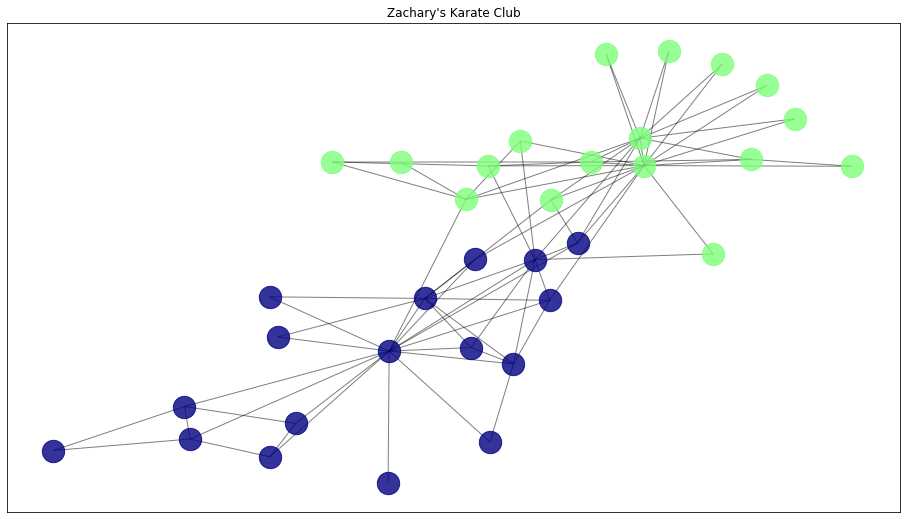

In [283]:
drawCommunities(G, groundTruth, pos)

In [284]:
def graphToEdgeMatrix(G):

    # Initialize Edge Matrix
    edgeMat = [[0 for x in range(len(G))] for y in range(len(G))]

    # For loop to set 0 or 1 ( diagonal elements are set to 1)
    for node in G:
        tempNeighList = G.neighbors(node)
        for neighbor in tempNeighList:
            edgeMat[node][neighbor] = 1
        edgeMat[node][node] = 1

    return edgeMat

In [285]:
def incorrect(labels):
    labels
    
    incorrect = []
    for i in range(len(labels)):
        if labels[i] != groundTruth[i]:
            incorrect.append(i)
    
    return incorrect

def score(labels):
    labels
    
    score = 0
    for i in range(len(labels)):
        if labels[i] == groundTruth[i]:
            score += 1
    
    return score / len(labels)

In [323]:
def flipLabels(labels):
    for i in range(len(labels)):
        labels[i] = abs(labels[i] - 1)
        
    return labels

In [319]:

edgeMat = graphToEdgeMatrix(G)
edgeMat

[[1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0],
 [1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0],
 [1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0],
 [1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [1,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


In [320]:
kClusters = 2
results = []
algorithms = {}

algorithms['kmeans'] = cluster.KMeans(n_clusters = kClusters, n_init=200)

algorithms['spectral'] = cluster.SpectralClustering(n_clusters = kClusters, affinity="precomputed", n_init=200)

algorithms['agglomerative'] = cluster.AgglomerativeClustering(n_clusters = kClusters, linkage="ward")

for model in algorithms.values():
    model.fit(edgeMat)
    results.append(list(model.labels_))


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
C:\Users\jeffz\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


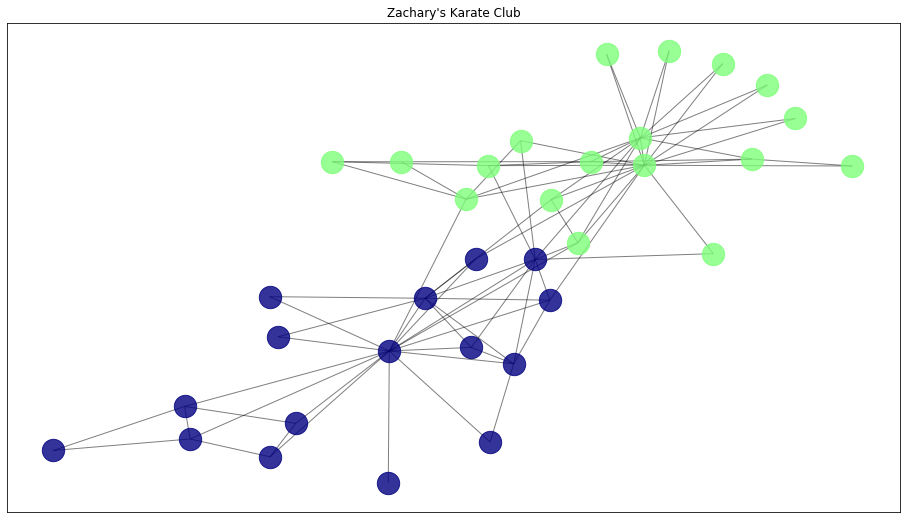

In [321]:
# plot it
drawCommunities(G, list(algorithms['kmeans'].labels_), pos)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


1
0
1
0
0
1
1
0
1
0
1
0
1
0
1
0
0
1
0
1
1
0
1
0
1
0
1
0
0
1
0
1
1
0
1
0
0
1
1
0
0
1
1
0
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


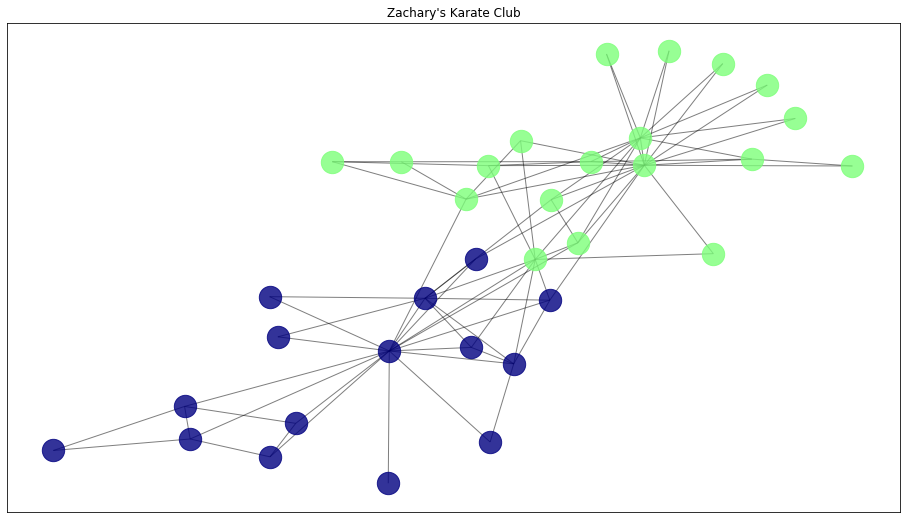

In [322]:
# plot it
spectral = flipLabels(algorithms['spectral'].labels_)

drawCommunities(G, spectral, pos)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


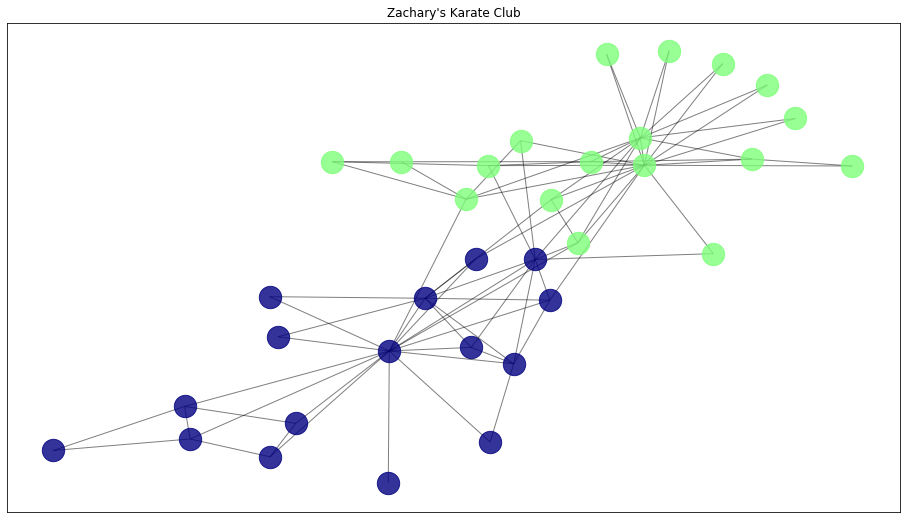

In [290]:
# plot it
drawCommunities(G, list(algorithms['agglomerative'].labels_), pos)

In [291]:
import csv
import random
import math
import operator

karateData = []

#for v in G:
#    karateData.append((v, G.degree(v)))
    
#for i in range(len(edgeMat)):
#    karateData.append(edgeMat[i])

for i in range(len(edgeMat)):
    for j in range(len(edgeMat[i])):
        karateData.append((i, j, edgeMat[i][j]))
        
print(len(karateData[0]))
print(karateData[0][0])
print(karateData[0][1])
print(karateData[0][2])
                      
#with open('karate.csv', 'w') as csvFile:
#    writer = csv.writer(csvFile, lineterminator='\n')
#    writer.writerows(karateData)
#csvFile.close()

#def loadDataset(filename, split, trainingSet=[] , testSet=[]):
#    with open(filename, "rt") as csvfile:
#        lines = csv.reader(csvfile)
#        dataset = list(lines)
#        for x in range(len(dataset)-1):
#            for y in range(3):
#                dataset[x][y] = float(dataset[x][y])
#            if random.random() < split:
#                trainingSet.append(dataset[x])
#            else:
#                testSet.append(dataset[x])

3
0
0
1


# Community Detection Algorithm

In [292]:
import math
import csv
import random as rand
import sys

_DEBUG_ = False

def build(Gnew, edgeMat):
    for i in range(len(edgeMat)):
        for j in range(len(edgeMat[i])):
            if (edgeMat[i][j] != 0):
                # Line format: u, v
                Gnew.add_edge(i, j, weight = 1.0)

In [293]:
# This method keeps removing edges from Graph until one of the connected components of Graph splits into two
# compute the edge betweenness
def CmtyGirvanNewmanStep(G):
    if _DEBUG_:
        print("Running CmtyGirvanNewmanStep method ...")
    init_ncomp = nx.number_connected_components(G)    #no of components
    ncomp = init_ncomp
    while ncomp <= init_ncomp:
        if nx.is_empty(G):
            return
        bw = nx.edge_betweenness_centrality(G, weight='weight')    #edge betweenness for G
        #find the edge with max centrality
        max_ = max(bw.values())
        #find the edge with the highest centrality and remove all of them if there is more than one!
        for k, v in bw.items():
            if float(v) == max_:
                G.remove_edge(k[0],k[1])    #remove the central edge
        ncomp = nx.number_connected_components(G)    #recalculate the no of components

In [294]:
# This method compute the modularity of current split
def _GirvanNewmanGetModularity(G, deg, m):
    newA = nx.adj_matrix(G)
    newDeg = {}
    newDeg = UpdateDeg(newA, G.nodes())
    #Let's compute the Q
    comps = nx.connected_components(G)    #list of components    
    print('No of communities in decomposed G:', nx.number_connected_components(G))
    mod = 0    #Modularity of a given partitionning
    for c in comps:
        EWC = 0    #no of edges within a community
        RE = 0    #no of random edges
        for u in c:
            EWC += newDeg[u]
            RE += deg[u]        #count the probability of a random edge
        mod += ( float(EWC) - float(RE*RE)/float(2*m) )
    mod = mod/float(2*m)
    if _DEBUG_:
        print("Modularity:", mod)
    return mod

In [295]:
def UpdateDeg(A, nodes):
    degDict = {}
    n = len(nodes)
    B = A.sum(axis = 1)
    i = 0
    for nodeId in list(nodes):
        degDict[nodeId] = B[i, 0]
        i += 1
    return degDict

In [296]:
# Runs GirvanNewman algorithm and find the best community split by maximizing modularity measure
def runGirvanNewman(G, origDeg, m):
    # Find the best split of the graph
    BestQ = 0.0
    Q = 0.0
    while True:    
        CmtyGirvanNewmanStep(Gnew)
        Q = _GirvanNewmanGetModularity(G, origDeg, m);
        print("Modularity of decomposed G:", Q)
        if Q > BestQ:
            BestQ = Q
            Bestcomps = list(nx.connected_components(G))    #Best Split
            print("Components:", Bestcomps)
        if G.number_of_edges() == 0 or nx.number_connected_components(G) == 2:
            break
    if BestQ > 0.0:
        print("Max modularity (Q):", BestQ)
        print("Graph communities:", Bestcomps)
    else:
        print("Max modularity (Q):", BestQ)
        
    return Bestcomps

In [297]:
Gnew = nx.Graph()  #let's create the graph first
#buildG(G, 'karate.csv')
build(Gnew, edgeMat)

print('G nodes:', Gnew.nodes())
print('G no of nodes:', Gnew.number_of_nodes())

n = Gnew.number_of_nodes()    #|V|
A = nx.adj_matrix(Gnew)    #adjacent matrix, basically edgeMat

m = 0.0    #the weighted version for number of edges
for i in range(0, n):
    for j in range(0, n):
        m += A[i,j]
m = m/2.0

#calculate the weighted degree for each node
origDeg = {}
origDeg = UpdateDeg(A, Gnew.nodes())

#run Newman alg
result = list(runGirvanNewman(Gnew, origDeg, m))

labels = [0] * 34
for i in range(len(result)):
    result[i] = list(result[i])

for j in range(len(result[1])):
    labels[result[1][j]] = 1
        
incorrect = []
percent = 0
for i in range(len(labels)):
    if labels[i] != groundTruth[i]:
        incorrect.append(i)
    else: percent += 1

percent /= len(labels)
print(incorrect,
      percent)

G nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31, 30, 9, 27, 28, 32, 16, 33, 14, 15, 18, 20, 22, 23, 25, 29, 24, 26]
G no of nodes: 34
No of communities in decomposed G: 2
Modularity of decomposed G: 0.3733518005540166
Components: [{0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]
Max modularity (Q): 0.3733518005540166
Graph communities: [{0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]
[2, 8] 0.9411764705882353


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
C:\Users\jeffz\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


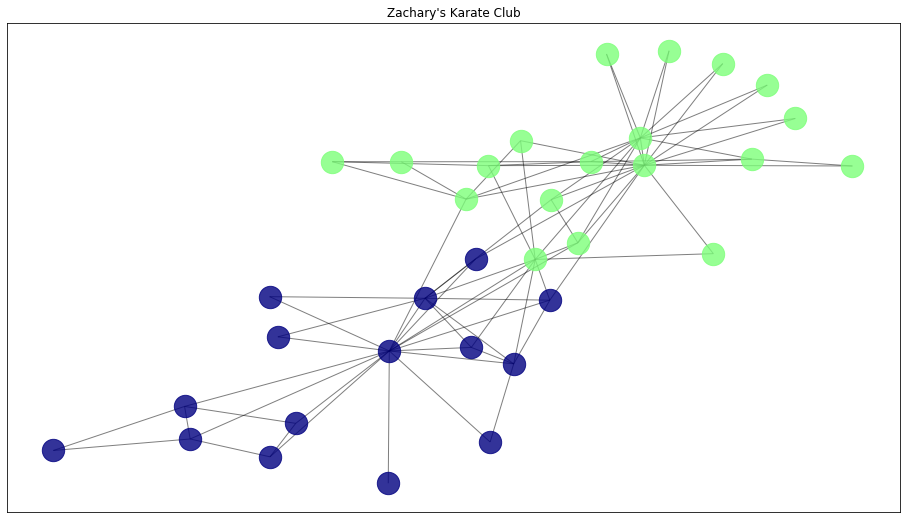

In [298]:
drawCommunities(G, labels, pos)

# Results

<BarContainer object of 4 artists>

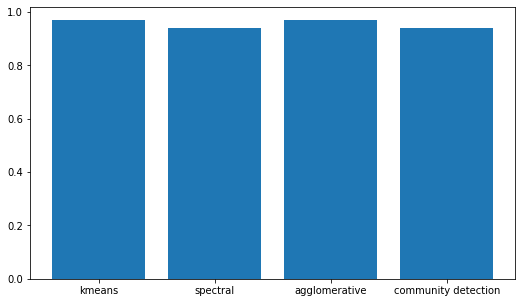

In [345]:
# Code for plotting results

names = ['kmeans', 'spectral', 'agglomerative', 'community detection']
scores = []

for i in range(len(names) - 1):
    scores.append(score(list(algorithms[names[i]].labels_)))
    
scores.append(score(labels))

scores

plt.figure(figsize=(40, 5))

plt.subplot(141)
plt.bar(names, scores)